## Linear Regression From Scratch

As I learned before, a standard ML training process has three main components. First one is model, second one is objective (cost, loss, error) function, and finally an optimazer. My main purpose in this notebook is building a linear regression algorithm from scratch using only mathematical theory based on the rule.

sources:

1. How to implement Linear Regression from scratch with Python (https://www.youtube.com/watch?v=ltXSoduiVwY)
2. Linear Regression From Scratch in Python (Mathematical) (https://www.youtube.com/watch?v=VmbA0pi2cRQ)
3. Linear Regression (https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html)
4. Gradient Descent (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)


## What is Linear Regression

It is a supervised machine learning algorithm to predict the output where it is continuous and has a constant slope. There are two main types of it: simple regression and multivariable regression. In this notebook, I will go forward with simple regression to make the development easy and understandable.

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction. ([3](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#toc-entry-1))

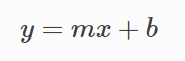

In machine learning we can call coefficients (m) *weights*, variables (x) *features*, and intercepts (b) *bias*. ([3](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#toc-entry-3))

##### Objective (Cost, Loss, Error) Function

Objective function is used to calculate the error between actual values and predicted values. To be able to do this job, for linear regression algorithm, Mean Squared Error (MSE) formula can be used.

The output is a single number representing the cost, or score, associated with our current set of weights. Our goal is to minimize MSE to improve the accuracy of our model. ([3](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#toc-entry-3))

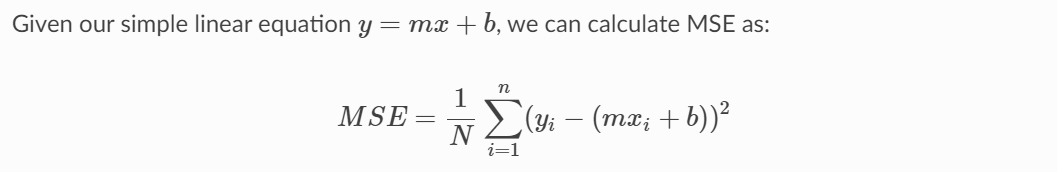

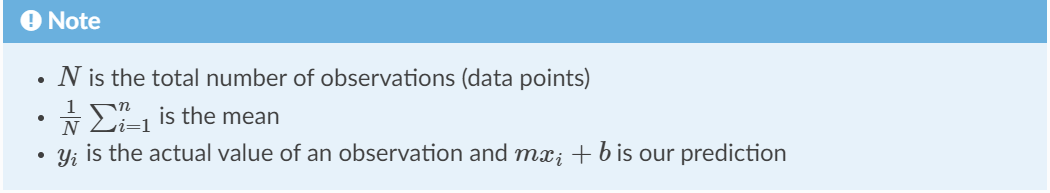

##### Optimizer

Firstly, we have a model applying y = mx + b formula to predict (?) the output based on the given input x. At the beginning *m* and *b* have an initial value, maybe 0. When you give a data to the model to train it, objective function compare the actual (exist in the data) value and model's (y = mx + b) result, and  calculate an error value. If the value is at optimum level then we can continue the current *m* and *b* values, and this is the end of the traning process. Otherwise, we use *Optimizer* to update the parameters (in this case *m* and *b*).

For this purpose, Gradient Descent is used to minimize MSE by calculating the gradient of our objective function. Gradient descent consists of looking at the error that our weight currently gives us, using the derivative of the cost function to find the gradient (The slope of the cost function using our current weight), and then changing our weight to move in the direction opposite of the gradient. We need to move in the opposite direction of the gradient since the gradient points up the slope instead of down it, so we move in the opposite direction to try to decrease our error. ([3](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#gradient-descent))

There are two parameters (coefficients) in our cost function we can control: weight m and bias b. Since we need to consider the impact each one has on the final prediction, we use partial derivatives.

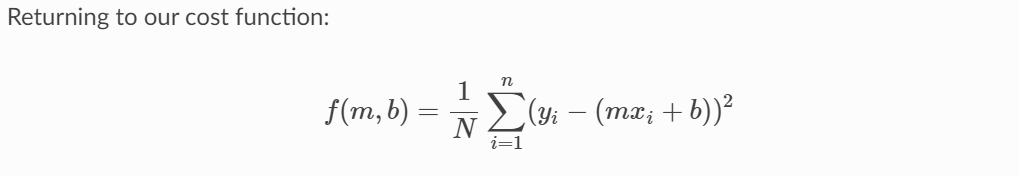

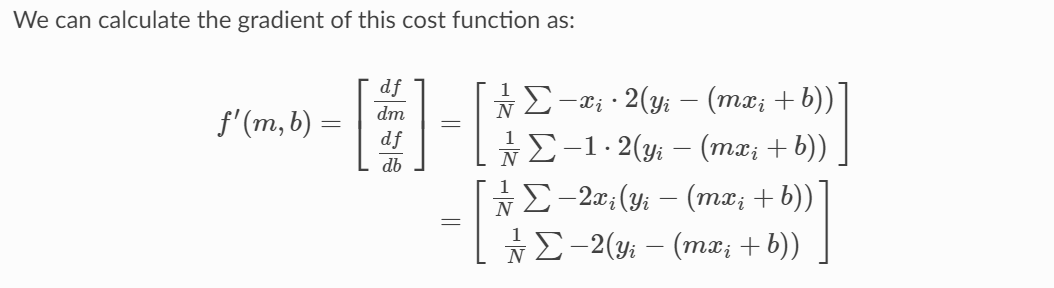

further reading for Gradient Descent: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

##### Train

Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost. ([3](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#training))

## Implement the Theory in Python

In [63]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting (for visualization)
from sklearn import datasets # to prepare a random dataset

In [64]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        """
            Constructor for the LinearRegression class
            
            :param learning_rate: float, the learning rate for the gradient descent optimizer
            :param epochs: int, the number of epochs to train the model
        """
        self.learning_rate = learning_rate # the learning rate of the model
        self.epochs = epochs # number of iterations to train the model
        
        self.weights = None # the weights of the model
        self.bias = None # the bias of the model

    def fit(self, X, y):
        """
            Function to train the linear regression model
            
            :param X: numpy array, the input data (matrix)
            :param y: numpy array, the target data (vector)
        """
        
        n_samples, n_features = X.shape
        # n_samples: number of samples (cells) in the dataset
        # n_features: number of features (columns) in the dataset
        
        self.weights = np.zeros(n_features) # initialize the weights to zeros (for each cells)
        self.bias = 0 # initialize the bias to zero
        
        for _ in range(self.epochs): # iterate over the epochs to train the model
            # use objective_function to calculate the error
            error = self.objective_function(X, y)
            
            # use optimizer to update the weights and bias
            self.optimizer(X, y)
            
            # print the error, weights, and bias every 50 epochs
            if _ % 50 == 0:
                print(f'Error at epoch {_}: {error}')
                print(f'Weights: {self.weights}')
                print(f'Bias: {self.bias}')
                
                # plot the data and the model
                plt.scatter(X, y, color='blue')
                plt.plot(X, self.predict(X), color='red')
                plt.show()
            

    def predict(self, X):
        """
            Function to predict the target data
            
            Formula: y = X * weights + bias (linear regression model)
            
            :param X: numpy array, the input data (matrix)
        """
        # we cannot use y = x * weights + bias directly because X is a matrix (2D array),
        # so we need to use the dot product to multiply the matrix by the weights and add the bias
        
        return np.dot(X, self.weights) + self.bias

    
    def objective_function(self, X, y):
        """
            Function to calculate the objective function (Mean Squared Error)
            
            Formula: (1 / n_samples) * sum((y - y_predicted) ** 2)
            
            :param X: numpy array, the input data
            :param y: numpy array, the target data
        """
        
        n_samples = X.shape[0]
        y_predicted = self.predict(X) # get the predicted target data
        
        error = (1 / n_samples) * np.sum((y - y_predicted) ** 2) # calculate the mean squared error
        
        return error
    
    def optimizer(self, X, y):
        """
            Function to optimize the model parameters using gradient descent
            
            Formula: weights = weights - learning_rate * dw
                     bias = bias - learning_rate * db
                     
                     dw is the partial derivative of the weights with respect to the error (gradient)
                     db is the partial derivative of the bias with respect to the error (gradient)
            
            :param X: numpy array, the input data (matrix)
            :param y: numpy array, the target data (vector)
        """
        
        n_samples = X.shape[0]
        y_predicted = self.predict(X)

        dw = (1 / n_samples) * -2 * np.dot(X.T, (y - y_predicted))
        db = (1 / n_samples) * -2 * np.sum(y - y_predicted)
        
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

## Usage of the Model

Weights: None
Bias: None
Error at epoch 0: 6061.59304874825
Weights: [0.61194685]
Bias: 0.06945737619423745


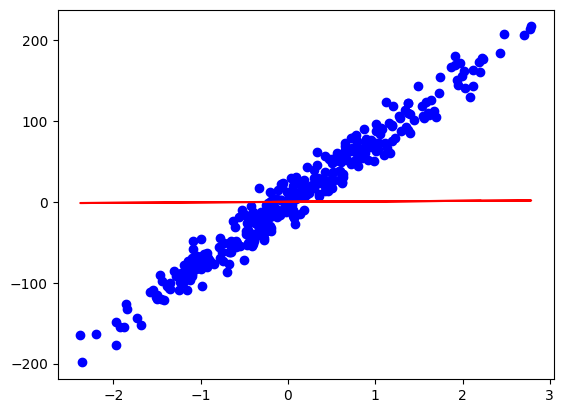

Error at epoch 50: 2812.880918869328
Weights: [25.66077472]
Bias: 2.404830292480468


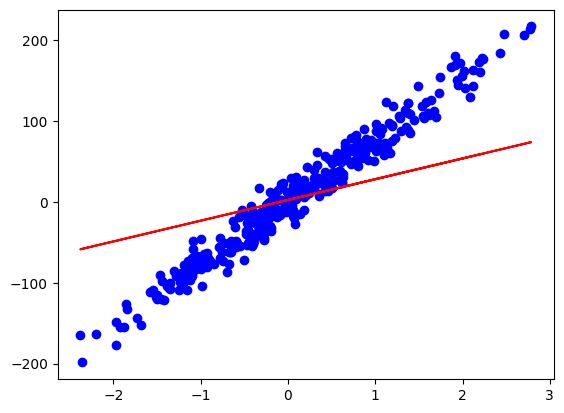

Error at epoch 100: 1375.6939672301583
Weights: [42.37515447]
Bias: 3.2485733264231347


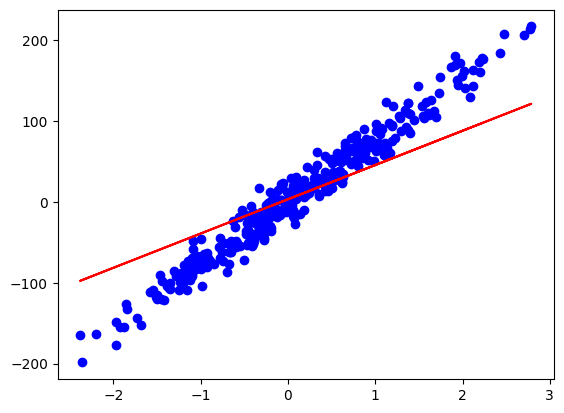

Error at epoch 150: 735.2441619655956
Weights: [53.54874808]
Bias: 3.332915343588193


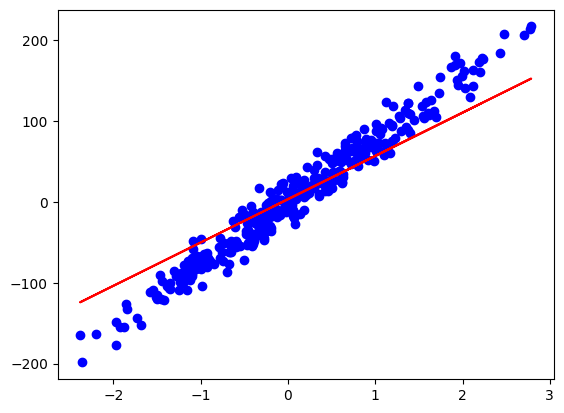

Error at epoch 200: 447.72976862828153
Weights: [61.03211598]
Bias: 3.067970754865675


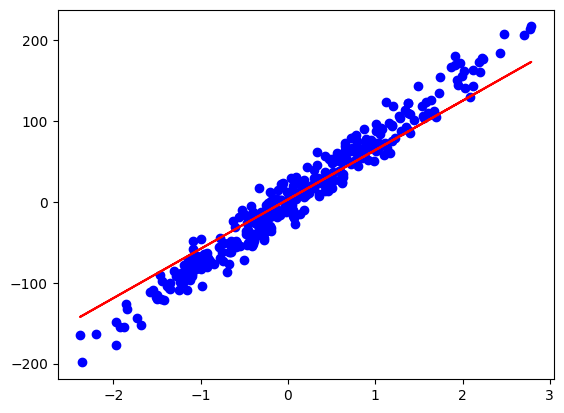

Error at epoch 250: 317.70600097478365
Weights: [66.05325047]
Bias: 2.6752172258550897


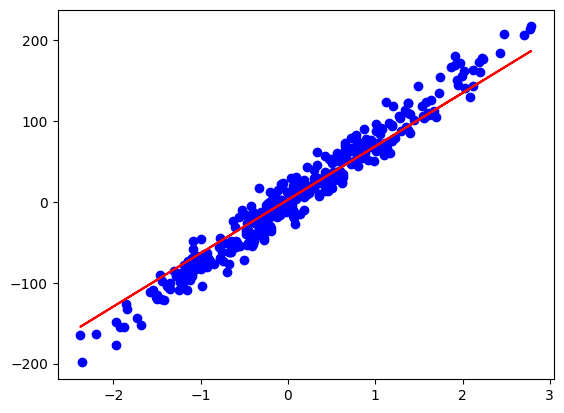

Error at epoch 300: 258.47971285190243
Weights: [69.42847853]
Bias: 2.267684411401083


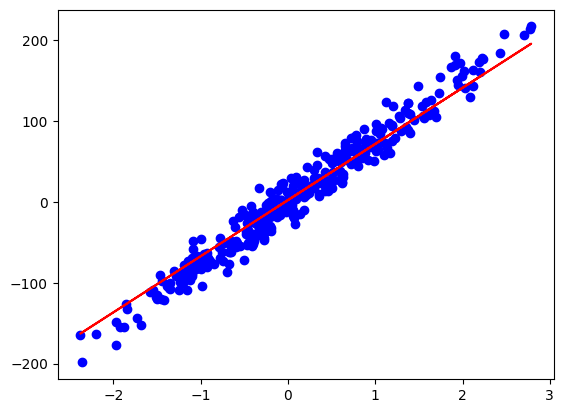

Error at epoch 350: 231.31330495596382
Weights: [71.7014501]
Bias: 1.8976010073758005


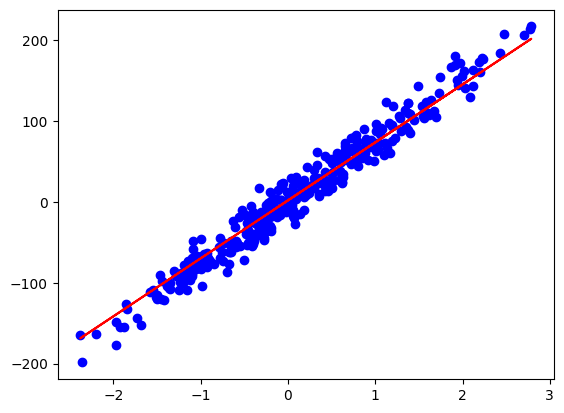

Error at epoch 400: 218.76930146051836
Weights: [73.23488312]
Bias: 1.584312642077036


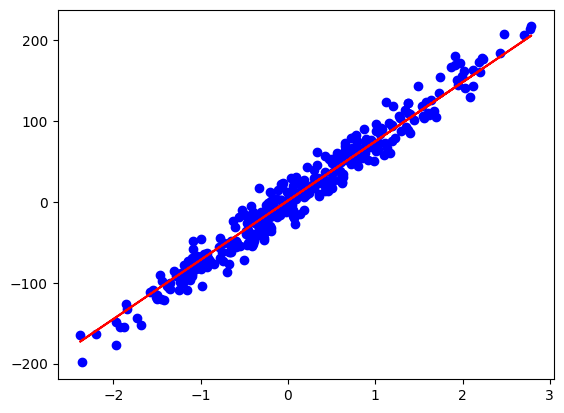

Error at epoch 450: 212.94080056196108
Weights: [74.27122542]
Bias: 1.3303433130859719


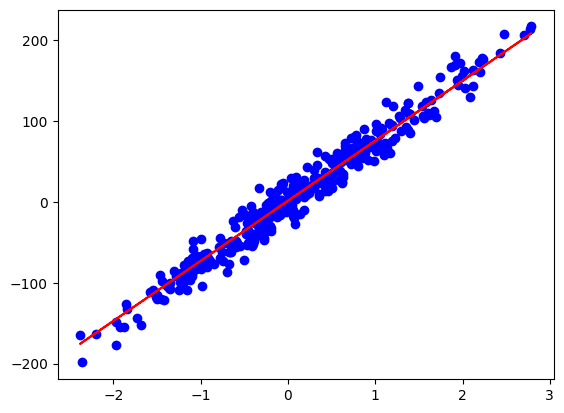

Error at epoch 500: 210.2168259886145
Weights: [74.97283331]
Bias: 1.1304089982834762


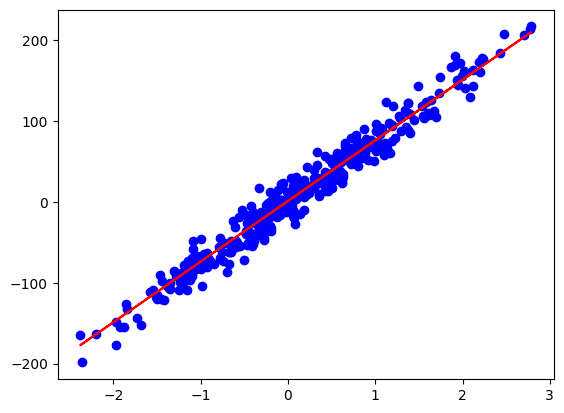

Error at epoch 550: 208.936944386807
Weights: [75.44863005]
Bias: 0.976299553311567


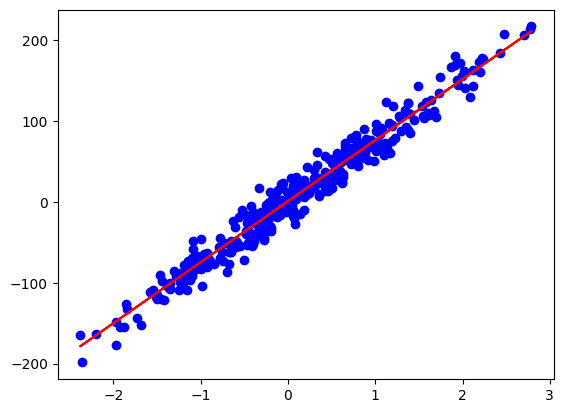

Error at epoch 600: 208.33265332745373
Weights: [75.7718254]
Bias: 0.8593819325039934


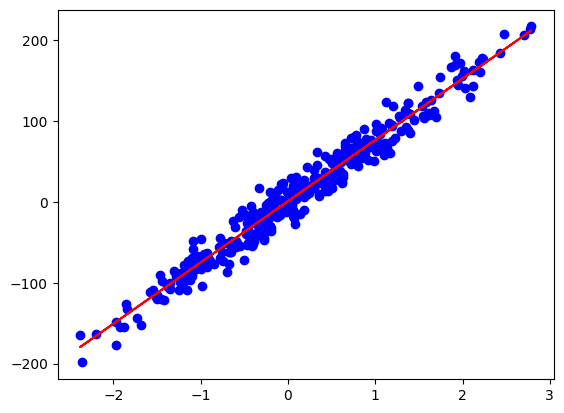

Error at epoch 650: 208.04608917692704
Weights: [75.99171491]
Bias: 0.7717672131151545


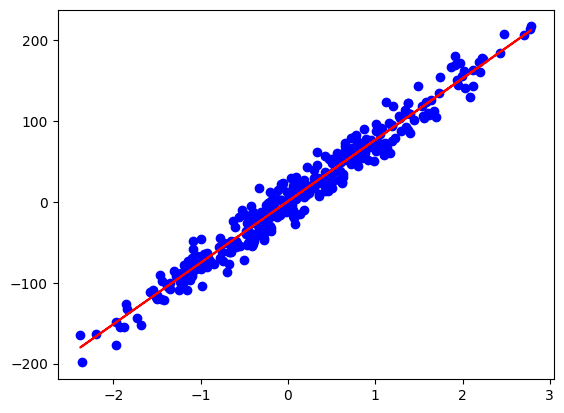

Weights: [76.13908185]
Bias: 0.7078689156660366
Final (Trained Model) Formula: y = 76.13908185246312 * x + 0.7078689156660366


In [65]:
model = LinearRegression(learning_rate=0.004, epochs=700) # create a LinearRegression model

# create some random data
X, y = datasets.make_regression(n_samples=350, n_features=1, noise=15, random_state=4)

# print the weights and bias before training
print(f'Weights: {model.weights}')
print(f'Bias: {model.bias}')

model.fit(X, y) # train the model

# print the weights and bias after training
print(f'Weights: {model.weights}')
print(f'Bias: {model.bias}')

# print final formula of the model
print(f'Final (Trained Model) Formula: y = {model.weights[0]} * x + {model.bias}')